<h1>Trabalho 3 - Unidade 2
<h2>Algoritmos e Estruturas de Dados II
<h4>Grupo: Rychardson Ribeiro de Souza e Thiago Jordão Melo da Costa


<h1>Importando Bibliotecas

In [41]:
!pip install nxviz==0.6.3
!pip install networkx==2.6.2
!pip install wikipedia
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


  Using cached matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.


In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd

In [43]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

<h1>Definindo o Grafo e o Título da página da Wikipédia

In [44]:
#Titulo
SEED = "Extremoz".title()
#Palavras que remetem a nós folha
STOPS = ("Isni (Identifier)",
         "International Standard Name Identifier",
         "Viaf (Identifier)",
         "Isbn (Identifier)",
         )

In [45]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [46]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [47]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Extremoz
1 Brazil
1 Estremoz
1 Flag Of Extremoz
1 Genipabu
1 Geographic Coordinate System
1 Municipality (Brazil)
1 Northeast Region, Brazil
1 Pdf
1 Regions Of Brazil
1 Rio Grande Do Norte
1 Seal Of Extremoz
1 States Of Brazil
1 Time In Brazil
1 Time Zone
Could not load Time Zone
1 Utc−3
CPU times: user 970 ms, sys: 55 ms, total: 1.02 s
Wall time: 8.08 s


In [48]:
#Quantidade de nós e conexões
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

3554 nodes, 4727 edges


In [49]:
# make a copy of raw graph
original = g.copy()

In [50]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Asian Brazilian', 'Asian Brazilians'), ('Pardo Brazilian', 'Pardo Brazilians'), ('White Brazilian', 'White Brazilians'), ('Bean', 'Beans')]
[('Semi-Arid', 'Semi Arid')]


In [51]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

3549 nodes, 4718 edges


In [52]:
# filtragem nós para grau >=6
core = [node for node, deg in dict(g.degree()).items() if deg >= 6]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

133 nodes, 806 edges


In [53]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

11 Brazil
10 Time In Brazil
9 Time Zone
8 Roraima
8 Rio Grande Do Norte
8 Amazonas (Brazilian State)
8 Regions Of Brazil
8 Northeast Region, Brazil
8 Geographic Coordinate System
7 Brazilian Carnival
7 Federal District (Brazil)
7 Mato Grosso Do Sul
7 States Of Brazil
7 Rondônia
7 President Of Brazil
7 Wayback Machine
7 Mato Grosso
7 Acre (State)
7 Portuguese Language
6 Foreign Relations Of Brazil
6 Social Issues In Brazil
6 Geography Of Brazil
6 Brazilian Cuisine
6 Economic History Of Brazil
6 Minas Gerais
6 Environment Of Brazil
6 Brazilian Science Fiction
6 Demographics Of Brazil
6 History Of Brazilian Animation
6 Water Supply And Sanitation In Brazil
6 Bibliography Of Brazil
6 Economy Of Brazil
6 Education In Brazil
6 Rocas Atoll
6 Income Inequality In Brazil
6 Brazilian Antarctica
6 Vargas Era
6 Military Dictatorship In Brazil
6 Industry In Brazil
6 National Symbols Of Brazil
6 Southeast Region, Brazil
6 Politics Of Brazil
6 Public Holidays In Brazil
6 Immigration To Brazil
6 Amapá

In [54]:
for i, j in gsub.nodes(data=True):
  gsub.nodes[i]["class"] = gsub.degree(i)

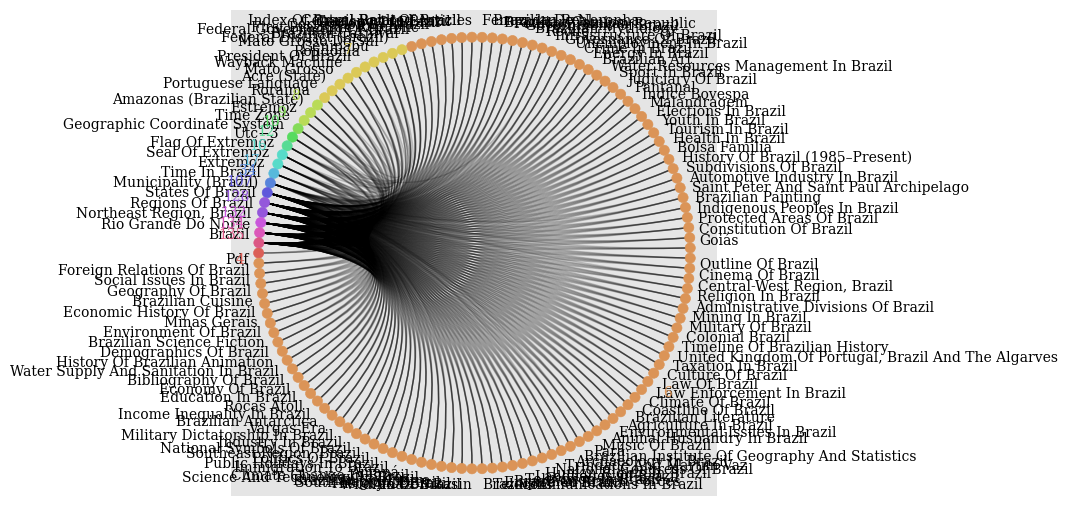

In [55]:
#quantidade de conexões de cada nó por cor
import nxviz
from nxviz.plots import CircosPlot
c = CircosPlot(
    gsub,
    node_grouping="class",
    node_color="class",
    node_order="class",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=1,
)
c.draw()
plt.show()

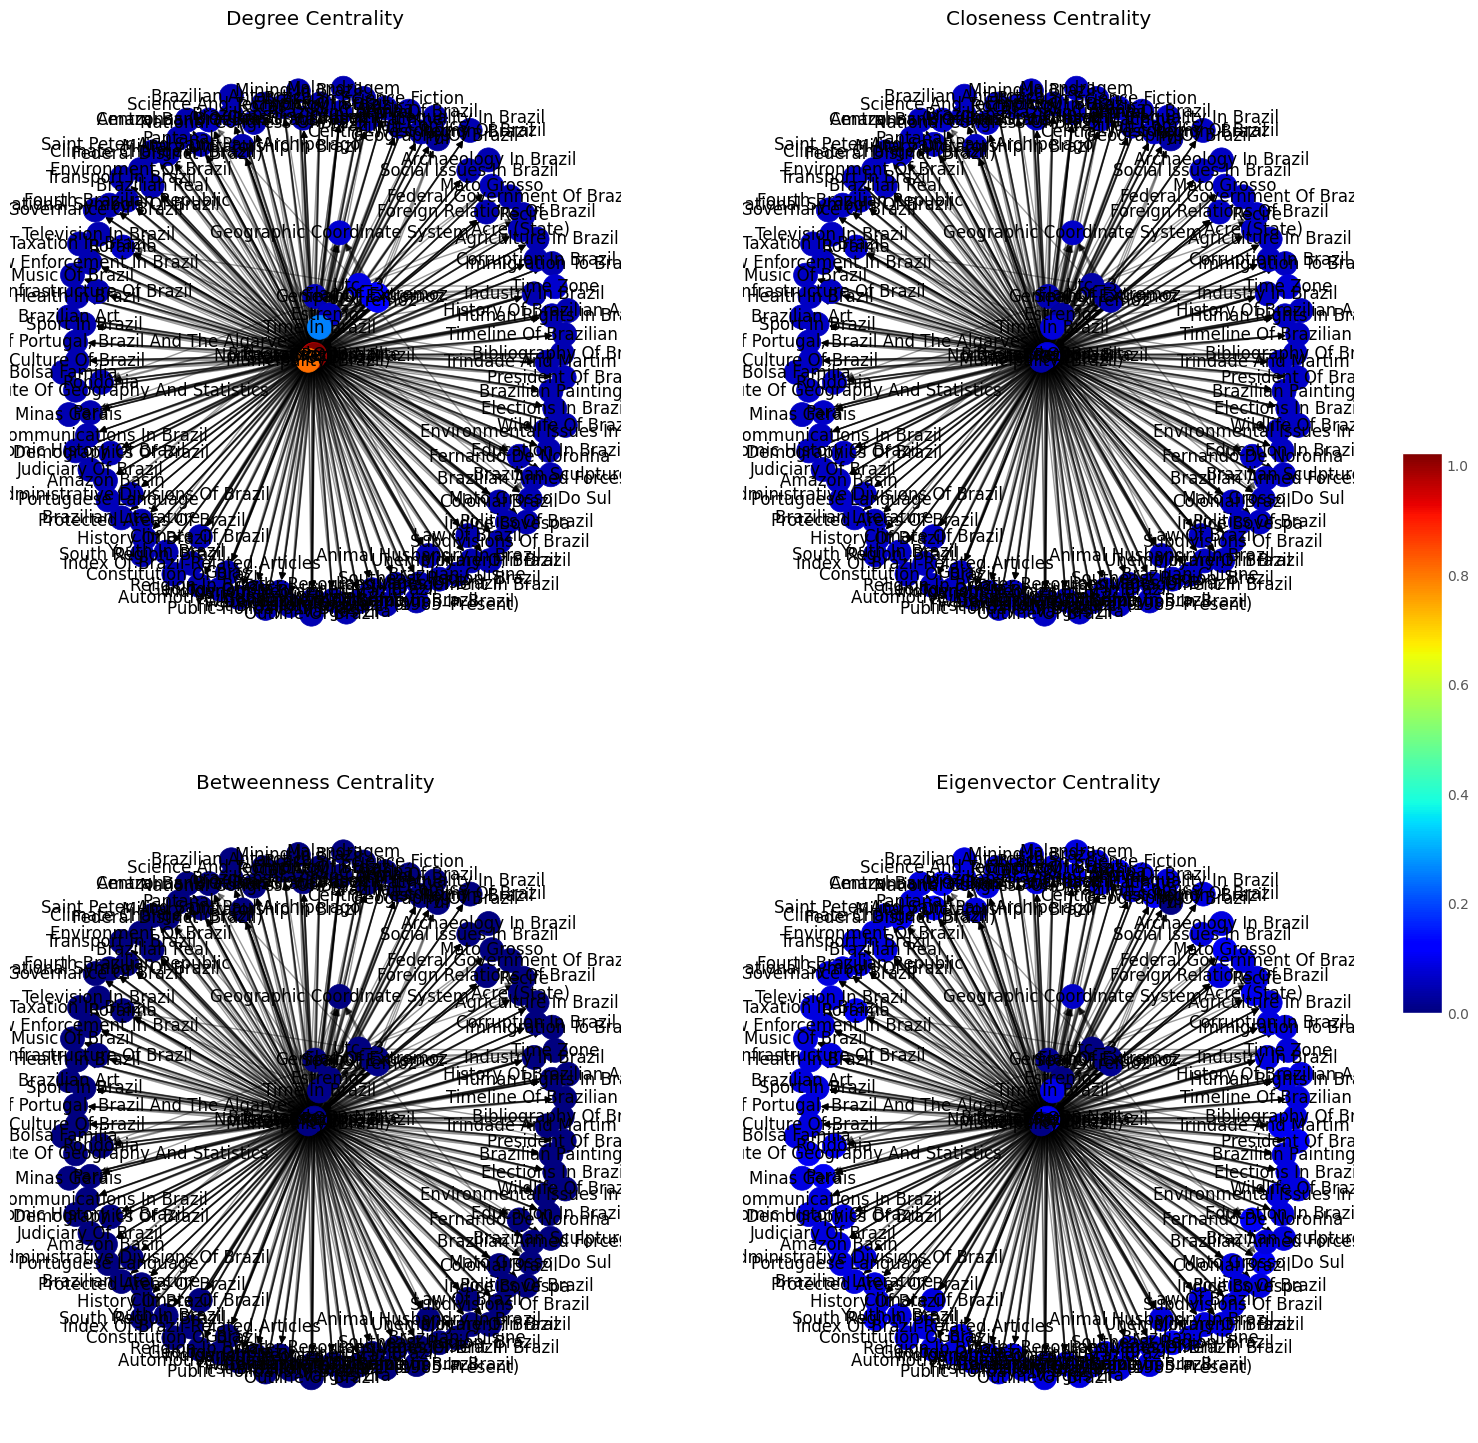

In [56]:
fig, ax = plt.subplots(2,2,figsize=(16,14))

# max value of metrics
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(gsub).items()]),
                      max([v for k, v in nx.degree_centrality(gsub).items()]),
                      max([v for k, v in nx.closeness_centrality(gsub).items()]),
                      max([v for k, v in nx.betweenness_centrality(gsub).items()])])

# layout position
pos = nx.spring_layout(gsub,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(gsub)).values())
color_closeness = list(dict(nx.closeness_centrality(gsub)).values())
color_betweenness = list(dict(nx.betweenness_centrality(gsub)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(gsub)).values())

#
# draw edges
#
# degree centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

#
# draw labels
#
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[0,0])
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[0,1])
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[1,0])
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centrality")
ax[0,1].set_title("Closeness Centrality")
ax[1,0].set_title("Betweenness Centrality")
ax[1,1].set_title("Eigenvector Centrality")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

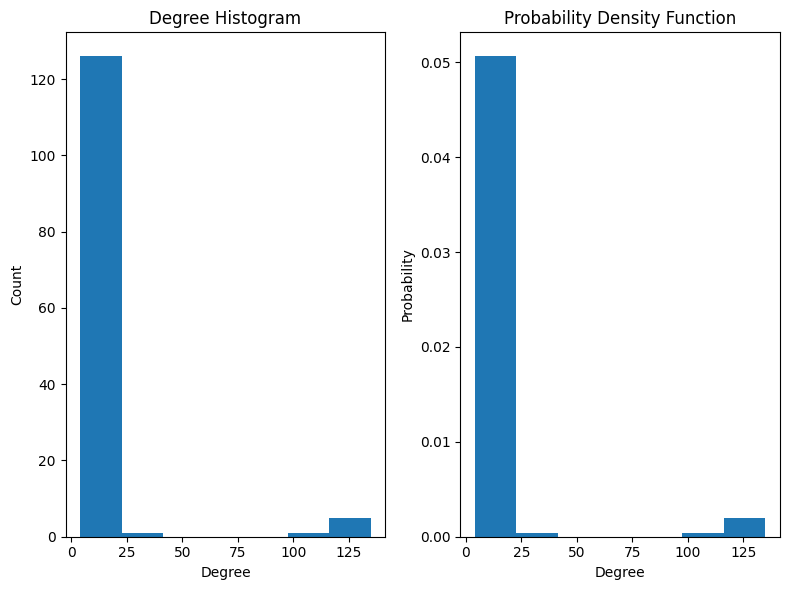

In [57]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in gsub.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

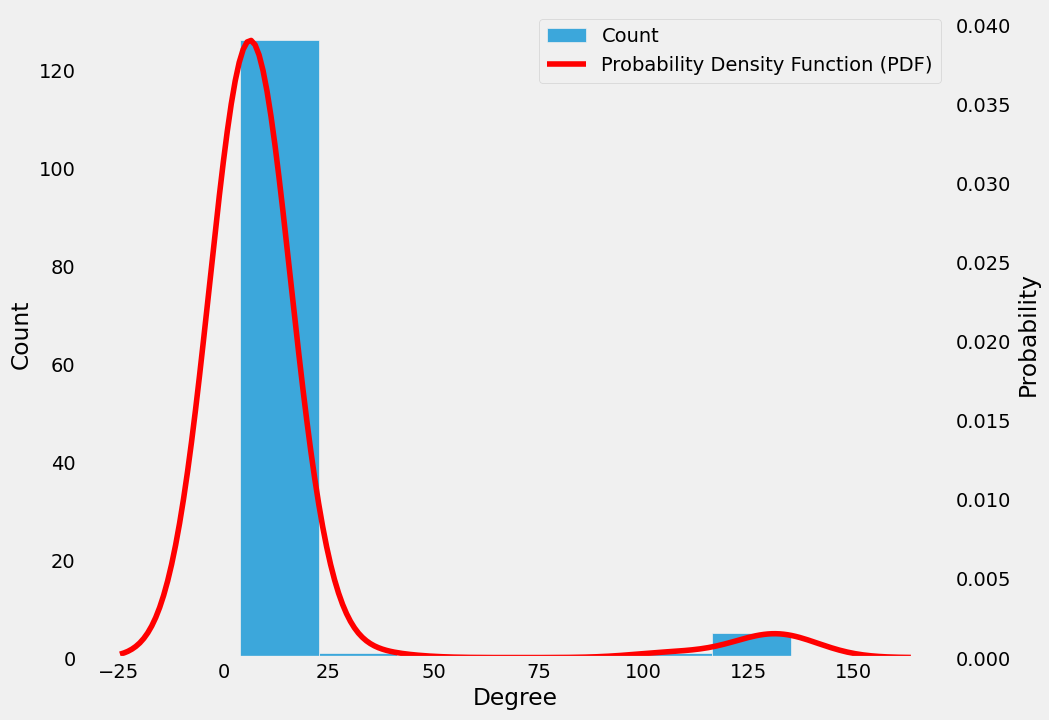

In [58]:
# calc the width of each bin using numpy
# diff calc the difference between two positions in the array
bin_width = np.diff(all_data[1])
bin_width


# total number of elements in array
all_data[0].sum()


# probability density function for each bin
# please check the right figure above and compare the results
all_data[0]/(all_data[0].sum() * bin_width)


plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

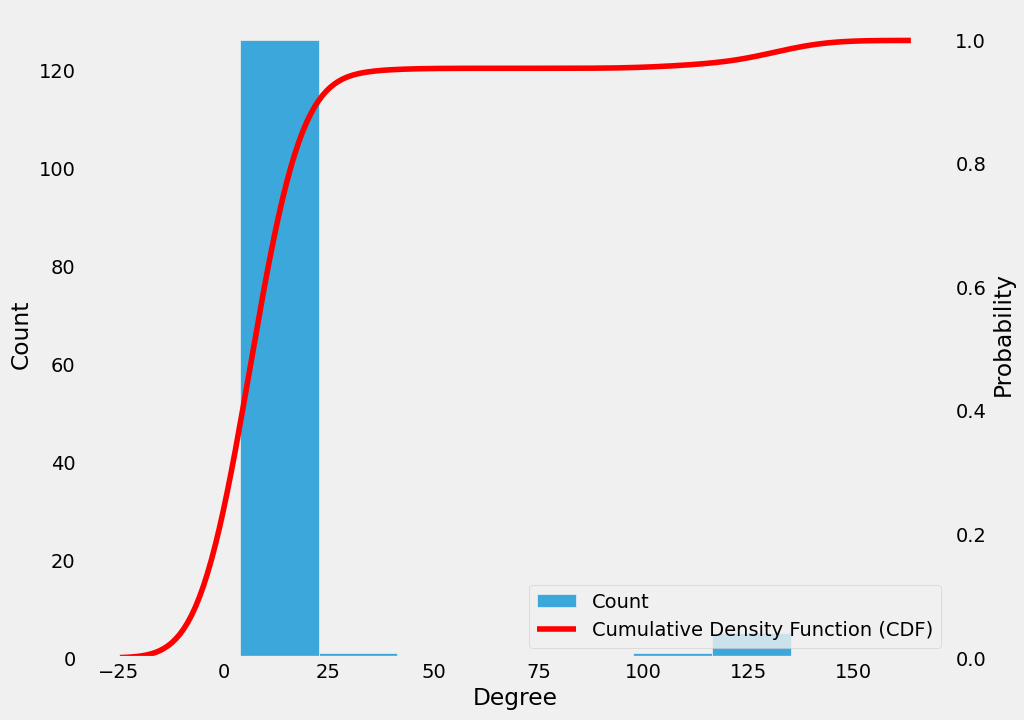

In [59]:
# grafico de densidade cumulativa
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()


plt.style.use("ggplot")

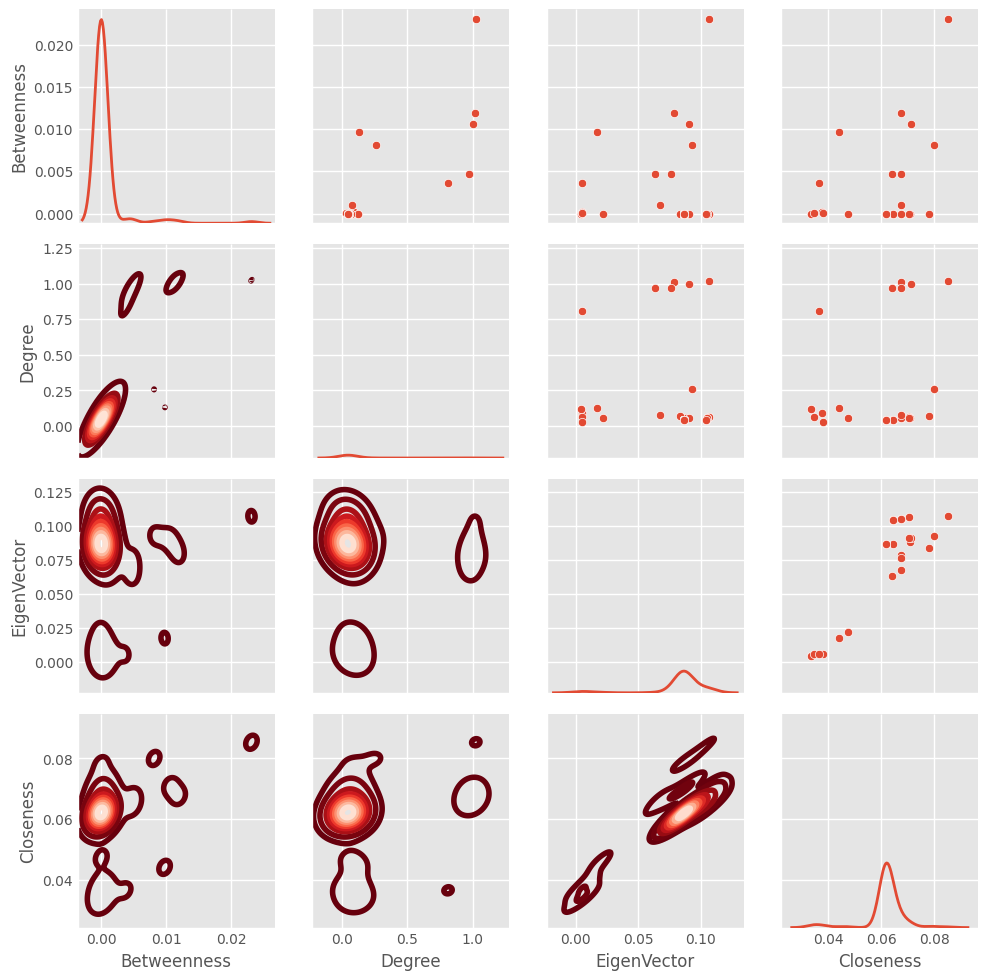

In [60]:
plt.style.use("ggplot")

bc = pd.Series(nx.betweenness_centrality(gsub))
dc = pd.Series(nx.degree_centrality(gsub))
ec = pd.Series(nx.eigenvector_centrality(gsub))
cc = pd.Series(nx.closeness_centrality(gsub))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

<h1>Decomposição do Núcleo

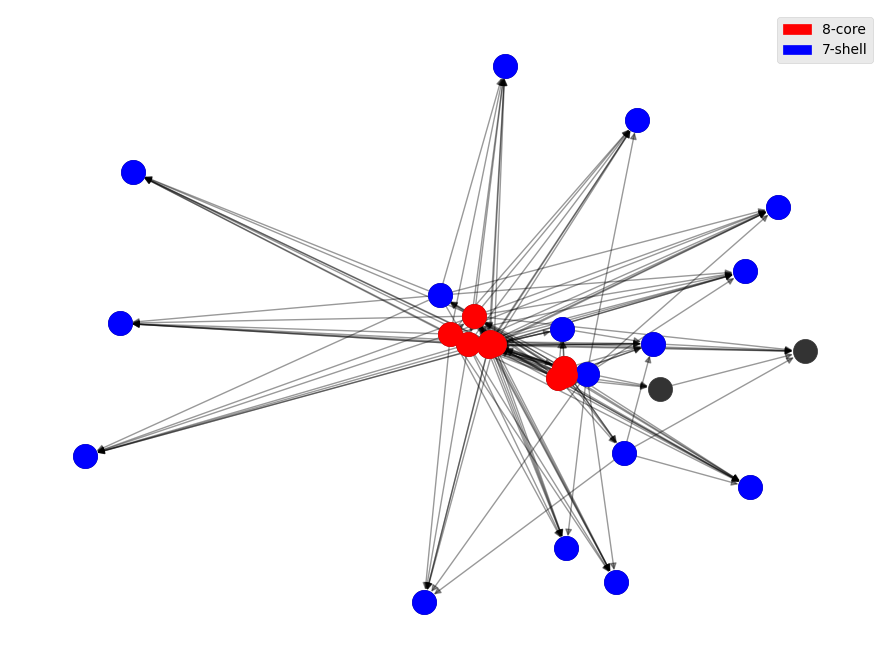

In [61]:
# the degree of network(gsub)
fig, ax = plt.subplots(1,1,figsize=(10,8))
core = [node for node, deg in dict(g.degree()).items() if deg >= 7]
# Find k-cores
gsub_core_13 = nx.k_shell(gsub, 7)
gsub_core_17 = nx.k_core(gsub, 8)
g = nx.subgraph(g, core)
# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(gsub_core_13,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(gsub_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='8-core')
blue_patch = mpatches.Patch(color='blue', label='7-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()